## Arrays

Collection of items stored at contiguous memory locations
Therefore, retrieval by index is O(1)
Append is O(1)


### Sorted Arrays

For sorted arrays
1) Searching for index corresponding to specific value is O(logn) - using binary search as array is sorted
2) Inserting element is worse case O(n) - first find place where insertion has to be done as array is sorted (this is O(logn) and then shift all elements after insertion position which is worse case O(n)) - therefore overall O(n)
3) Deleting elements - similar to insertion - first find position to delete, then shift all elements - O(n) worst case

### UnSorted Arrays

For unsorted arrays
1) Searching for index corresponding to specific value is O(n) - cannot use binary search since list is unsorted, have to iterate through whole array to find indices where value = k
2) Inserting element - O(1) - can just be done at end, since array is unsorted
3) Deleting elements - O(n) - search for indices where value = k , and then delete

## Python

In python, two common data structures can be used - array and list.  
Arrays are faster, and its necessary that all elements are of same dtype, lists are slower, and its not necessary that all elements are of same data type

https://www.geeksforgeeks.org/difference-between-list-and-array-in-python/

Internally, python lists are complicated data structures, and are nested pointers  . Basically, a python list is a pointer to a memory location, which is inturn a pointer to the memory location to all the elements in the list (contiguous). Each of these memory locations corresponding to a single list element is a pointer to the python datatype object which contains all attributes corresponding to the primitive data value such as
1) ob_refcnt, a reference count which handles allocation and deallocation of memory.
2) ob_type, type of variable.
3) ob_size, size of the data members.
4) ob_digit, the actual value the variable represents.

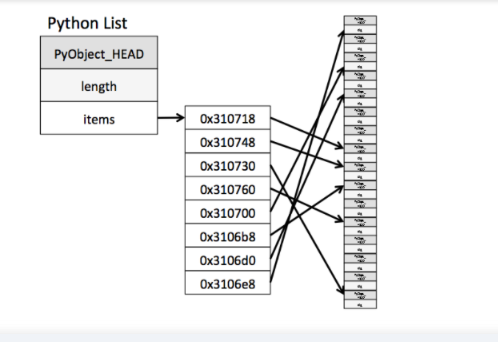

Reference - https://www.analyticsvidhya.com/blog/2021/05/why-you-should-avoid-using-python-lists/ , http://www.laurentluce.com/posts/python-list-implementation/

Since arrays enforce that all elements are of same dtype, some of the overhead is reduced, thus making them more efficient

### Memory allocation of python lists

Dynamic.  It over-allocates memory to avoid calling list_resize too many times. The growth pattern of the list is: 0, 4, 8, 16, 25, 35, 46, 58, 72, 88, etc.
So basically initially list is initialized to size 0, the moment first element is added, allocates memory space of 4. This is good till 4 elements are added. When fifth element is added, memory space is increased to 8 and so on

## References

1) https://www.geeksforgeeks.org/introduction-to-arrays/?ref=lbp 
2) https://www.geeksforgeeks.org/search-insert-and-delete-in-a-sorted-array/
3) https://www.geeksforgeeks.org/search-insert-and-delete-in-an-unsorted-array/
4) http://www.laurentluce.com/posts/python-list-implementation/ (How a python list is implemented)
5) https://www.analyticsvidhya.com/blog/2021/05/why-you-should-avoid-using-python-lists/ (Memory overhead of python lists compared to base arrays)

https://leetcode.com/problems/find-all-numbers-disappeared-in-an-array/
Given an array nums of n integers where nums[i] is in the range [1, n], return an array of all the integers in the range [1, n] that do not appear in nums.

 

In [2]:
from typing import List
class Solution:
    def findDisappearedNumbers(self, nums: List[int]) -> List[int]:
        all_nums = list(range(1, len(nums)+1, 1))
        return list(set(all_nums) - set(nums))

In [4]:
a = Solution()
nums = [1,1]

a.findDisappearedNumbers(nums)

[2]

In [5]:
from collections import Counter

In [9]:
Counter('helloo') | Counter('bro')

Counter({'h': 1, 'e': 1, 'l': 2, 'o': 2, 'b': 1, 'r': 1})

## https://leetcode.com/problems/product-of-array-except-self/d
## Product of array except self

In [ ]:
## this uses the division operation though

In [8]:
from typing import List
class Solution:
    def productExceptSelf(self, nums: List[int]) -> List[int]:
        
        zeros = []
        prod = 1
        
        for i in range(0, len(nums)):
            if nums[i]==0:
                zeros.append(i)
            else:
                prod = prod*nums[i]
                
        output = []
        for i in range(0, len(nums)):
            if nums[i]==0:
                if len(zeros)>1:
                    output.append(0)
                else:
                    output.append(int(prod))
            else:
                if len(zeros)>0:
                    output.append(0)
                else:
                     output.append(int(prod/nums[i]))
        return output
                    
                
        

In [9]:
a = Solution()

In [10]:
nums = [1,2,3,4]
nums = [-1,1,0,-3,3]

In [11]:
a.productExceptSelf(nums)

[0, 0, 9, 0, 0]

In [ ]:
## without using the division operation


In [122]:
from typing import List
class Solution:
    def productExceptSelf(self, nums: List[int]) -> List[int]:
        output = []
        
        left_prefix = 1
        right_prefix = 1
        
        left_prefix_prod = []
        right_prefix_prod = []
        
        n = len(nums)
        
        ## populate left_prefix_prod
        for i in range(0, n ):
            left_prefix_prod.append(left_prefix) ## for position i, have product of all elements before it
            left_prefix = left_prefix*nums[i]
            
        ## populate right_prefix_prod
        for i in range(0, n):
            right_prefix_prod.append(right_prefix)
            right_prefix = right_prefix*nums[(n-1-i)]
            
        ## now compute for every element, the prod of left_prefix_prod and right_prefix_prod
        for i in range(0,n):
            output.append(left_prefix_prod[i]*right_prefix_prod[(n-1-i)])
        return output
            
        
            
        
            
            
            
            
                    
                
        

In [123]:
a = Solution()

In [124]:
nums = [1,2,3,4]
nums = [-1,1,0,-3,3]

In [125]:
a.productExceptSelf(nums)

[0, 0, 9, 0, 0]

## https://leetcode.com/problems/longest-repeating-character-replacement/description/
## Longest repeating character replacement

In [115]:
class Solution:
    def characterReplacement(self, s: str, k: int) -> int:
        
        def max_val(d):
            m = 0
            for key in d:
                m = max(m, d[key])
            return m
        
        count_dict = {}
        n = len(s)
        
        left_pointer = 0
        max_len = 0
        for right_pointer in range(0, n):
            l = right_pointer-left_pointer + 1
            char = s[right_pointer]
            if char in count_dict:
                count_dict[char] = count_dict[char] + 1
            else:
                count_dict[char] = 1
                
            ## A given string is eligible if l-(char with max count) <= k
            max_val_dict = max_val(count_dict)
            if (l-max_val_dict)<=k:
                max_len = max(max_len, l)
            else: ## not eligible, have to shift left pointer, and remove from count_dict
                count_dict[s[left_pointer]] = count_dict[s[left_pointer]]  - 1
                left_pointer = left_pointer + 1
                
            
        return max_len
            
        

            
 

In [116]:
a = Solution()

In [117]:
s = "AABABBA"
k = 1
a.characterReplacement(s, k)

1 A
1 1
True
2 AA
2 2
True
3 AAB
3 2
True
4 AABA
4 3
True
5 AABAB
5 3
False
5 ABABB
5 3
False
5 BABBA
5 3
False


4

In [58]:
s[2] = '2'

TypeError: 'str' object does not support item assignment

In [56]:
s[0:2]

'AA'